Why do 30% of patients miss their appointments ?

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('/Users/vishalvalentine/Downloads/3253 - Machine Learning/Project/KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
list(df.columns)

['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'No-show']

In [4]:
#checking to see if there any missing values
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [5]:
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [6]:
df = df[(df['Age'] > 0) & (df['Age'] < 90)]

In [7]:
df['Age'].unique()

array([62, 56,  8, 76, 23, 39, 21, 19, 30, 29, 22, 28, 54, 15, 50, 40, 46,
        4, 13, 65, 45, 51, 32, 12, 61, 38, 79, 18, 63, 64, 85, 59, 55, 71,
       49, 78, 31, 58, 27,  6,  2, 11,  7,  3,  1, 69, 68, 60, 67, 36, 10,
       35, 20, 26, 34, 33, 16, 42,  5, 47, 17, 41, 44, 37, 24, 66, 77, 81,
       70, 53, 75, 73, 52, 74, 43, 89, 57, 14,  9, 48, 83, 72, 25, 80, 87,
       88, 84, 82, 86])

In [8]:
df['AppointmentDay'].unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

In [9]:
df['AppointmentDay'] = df['AppointmentDay'].apply(lambda x : x.replace('T00:00:00Z', ''))
df['AppointmentDay'] = pd.to_datetime(df['ScheduledDay'])

In [10]:
import time
import datetime as dt
from datetime import datetime

# extract days & months from the appointments
df['AppointmentDays'] = df['AppointmentDay'].apply(lambda x : dt.datetime.strftime(x, '%A'))
df['AppointmentMonths'] = df['AppointmentDay'].apply(lambda x : dt.datetime.strftime(x, '%B'))

In [11]:
df['AppointmentMonths'].unique()

array(['April', 'March', 'February', 'January', 'May', 'November',
       'December', 'June'], dtype=object)

In [12]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.065700e+05,1.065700e+05,106570.000000,106570.000000,106570.000000,106570.000000,106570.000000,106570.000000,106570.000000
mean,1.473100e+14,5.675473e+06,38.103772,0.101426,0.202036,0.073998,0.031529,0.022605,0.323515
std,2.558550e+14,7.123264e+04,22.250769,0.301894,0.401521,0.261769,0.174742,0.162859,0.467820
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.171614e+12,5.640490e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.171432e+13,5.680740e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.433654e+13,5.725664e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,89.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [13]:
#Who visits the doctor frequently ?
import seaborn as sns
import matplotlib.pyplot as plt

visiting = df[df['No-show'] == 'No']
sns.countplot(x = 'Gender', data = visiting)

In [14]:
# What is the patient age distribtuion for no shows versus those who
#shows up for the apppointment ?

df.groupby('No-show')['Age'].mean()

No-show
No     38.866408
Yes    35.102848
Name: Age, dtype: float64

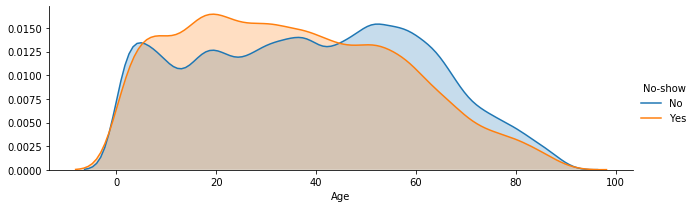

In [15]:
figure = sns.FacetGrid(df, hue='No-show', aspect=3)
figure.map(sns.kdeplot, 'Age', shade= True)
figure.add_legend()

In [16]:
#Number of males vs females in this dataset

df['Gender'].value_counts(normalize = False)

F    69825
M    36745
Name: Gender, dtype: int64

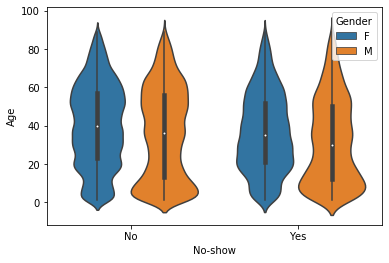

In [17]:
#Comparing the age of males and females and it's effect on showing up
#for the appointments

sns.violinplot(df['No-show'], df['Age'], hue = df['Gender'])

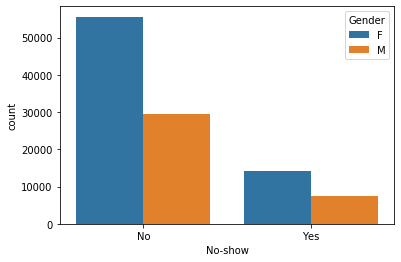

In [18]:
#Calculating the proportion of no shows if the patient is male or female

sns.countplot(x = 'No-show', hue = 'Gender', data=df)

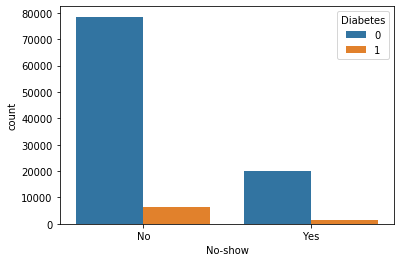

In [19]:
#Now we will compare the relation of no-show with various features

#First we will check the relationship between no-show vs Diabetes

sns.countplot(x = 'No-show', hue='Diabetes', data=df)

In [20]:
list(df.columns)

['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'No-show',
 'AppointmentDays',
 'AppointmentMonths']

In [21]:
#Next we compare the realtionship of No-show with the following features

#-'Scholarship'
#-'Hipertension'
#-'Alcoholism'
#-'Handcap'

Text(0.5, 1.0, 'No-show vs Alcoholism')

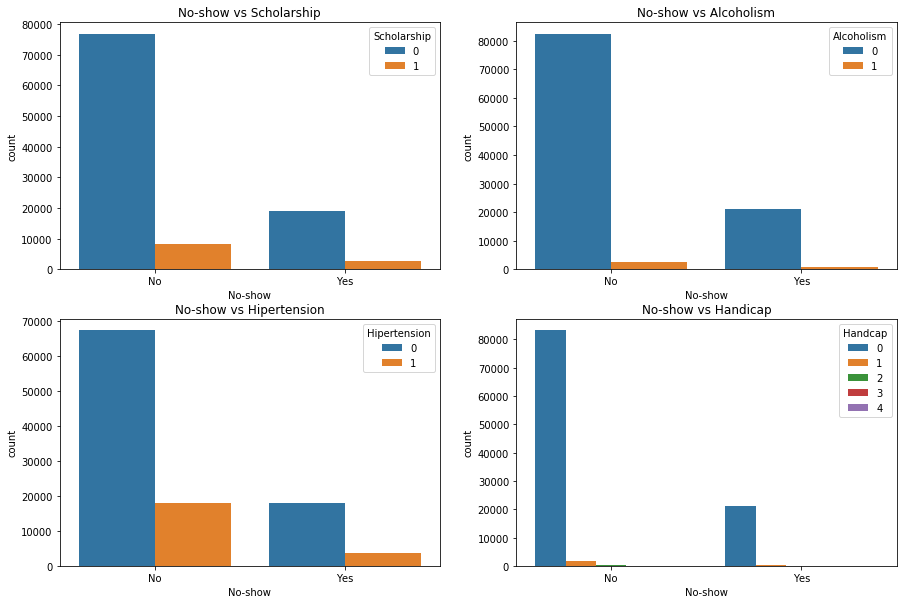

In [22]:
fig, ax =plt.subplots(2,2, figsize=(15,10))
sns.countplot(x='No-show', hue='Scholarship', data=df, ax=ax[0][0]).set_title('No-show vs Scholarship')
sns.countplot(x='No-show', hue='Handcap', data=df, ax=ax[1][1]).set_title('No-show vs Handicap')
sns.countplot(x='No-show', hue='Hipertension', data=df, ax=ax[1][0]).set_title('No-show vs Hipertension')
sns.countplot(x='No-show', hue='Alcoholism', data=df, ax=ax[0][1]).set_title('No-show vs Alcoholism')

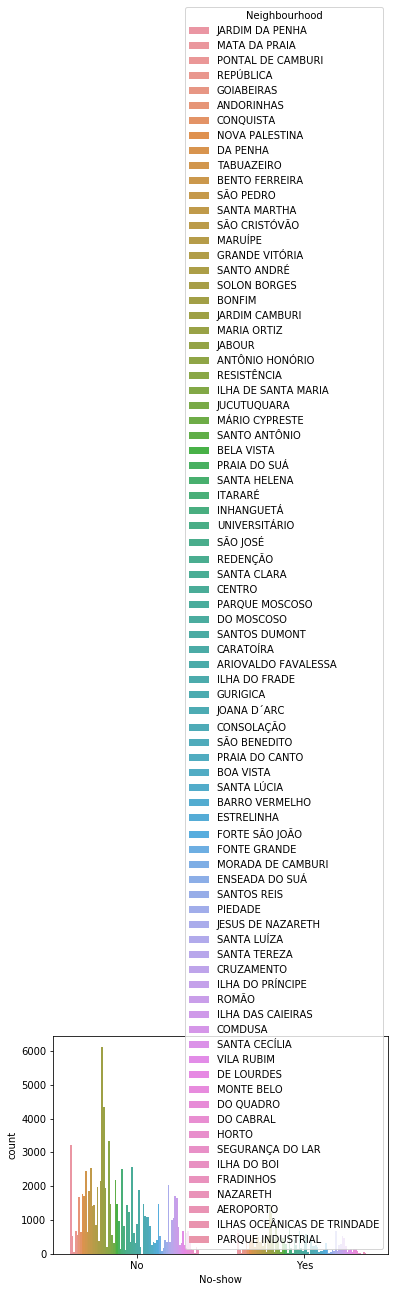

In [23]:
#Lastly we compare the relationship between no-shows vs neighbourhoods

sns.countplot(x='No-show', hue='Neighbourhood', data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]),
 <a list of 81 Text xticklabel objects>)

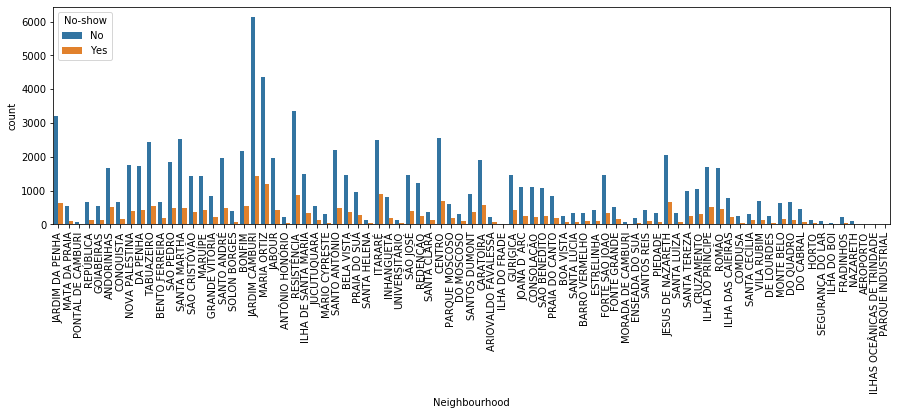

In [24]:
plt.figure(figsize=(15,4))
sns.countplot(x='Neighbourhood', hue='No-show', data=df)
plt.xticks(rotation=90)

In [25]:
#Determining which neighbourhood has the highest number of no shows

neigh_no_show = df[df['No-show'] == 'No']
neigh_no_show.groupby('Neighbourhood')['No-show'].count().sort_values(ascending=False)

Neighbourhood
JARDIM CAMBURI       6124
MARIA ORTIZ          4353
RESISTÊNCIA          3341
JARDIM DA PENHA      3206
CENTRO               2568
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: No-show, Length: 80, dtype: int64

In [26]:
#Determining which neighbourhood has the highest number of shows

neigh_no_show = df[df['No-show'] == 'Yes']
neigh_no_show.groupby('Neighbourhood')['No-show'].count().sort_values(ascending=False)

Neighbourhood
JARDIM CAMBURI                 1426
MARIA ORTIZ                    1193
ITARARÉ                         892
RESISTÊNCIA                     874
CENTRO                          686
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHAS OCEÂNICAS DE TRINDADE       2
ILHA DO FRADE                     2
AEROPORTO                         1
Name: No-show, Length: 80, dtype: int64

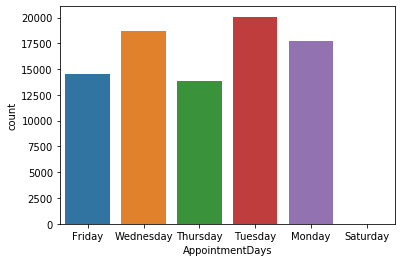

In [27]:
#Calculating the Day which has the highest number of patients visiting

sns.countplot(x = 'AppointmentDays', data=visiting)

In [28]:
visiting.groupby('AppointmentDays')['No-show'].count().sort_values(ascending=False)

AppointmentDays
Tuesday      20077
Wednesday    18723
Monday       17769
Friday       14518
Thursday     13867
Saturday        21
Name: No-show, dtype: int64

In [29]:
#From the above, we can infer that Thursday is the day where most people
#kept their appointments

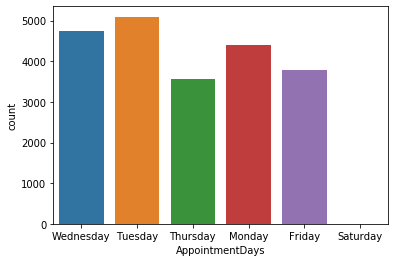

In [30]:
least_visiting = df[df['No-show'] == 'Yes']
sns.countplot(x='AppointmentDays', data=least_visiting)

In [31]:
least_visiting.groupby('AppointmentDays')['No-show'].count().sort_values(ascending=False)

AppointmentDays
Tuesday      5096
Wednesday    4740
Monday       4403
Friday       3780
Thursday     3575
Saturday        1
Name: No-show, dtype: int64

In [32]:
#From the above, it can be clearly determined that Tuesday is the day
#which has the highest number of no-shows

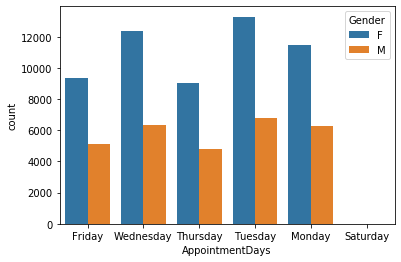

In [33]:
#Determining if males and females visit the doctor on the same day

sns.countplot(x= 'AppointmentDays', hue='Gender', data=visiting)

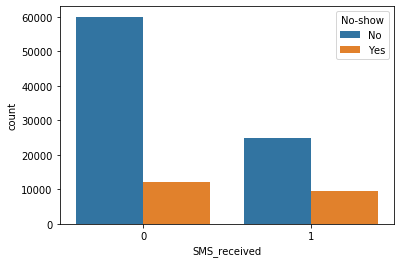

In [34]:
#We like to determine whether a patient would attaned their scheduled 
#appointment if they received an sms.

sns.countplot(x='SMS_received', hue = 'No-show', data = df)

In [35]:
#An interesting point to note is that the number of patients who kept 
#appointments were those who did not recive sms in comparison to those
#who received smses.

In [36]:
#Comparing the relation between the neighborhood and scholarship on no 
#show

ngrbd_schlrshp_nshw = pd.DataFrame(df[['Neighbourhood','Scholarship',
                                       'No-show']].groupby( 
    ['Neighbourhood', 'No-show','Scholarship']).size().
                                   reset_index(name = 'Count'))

In [37]:
ngrbd_schlrshp_nshw

,Neighbourhood,No-show,Scholarship,Count
0,AEROPORTO,No,0,7
1,AEROPORTO,Yes,0,1
2,ANDORINHAS,No,0,1452
3,ANDORINHAS,No,1,230
4,ANDORINHAS,Yes,0,414
...,...,...,...,...
298,UNIVERSITÁRIO,Yes,1,3
299,VILA RUBIM,No,0,625
300,VILA RUBIM,No,1,60
301,VILA RUBIM,Yes,0,129


In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics, preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, cohen_kappa_score, classification_report, accuracy_score, f1_score

In [39]:
# converting categorical data to numerical data
df['Gender'] = pd.get_dummies(df['Gender'])

le = preprocessing.LabelEncoder()
df['Age'] = le.fit_transform(df['Age'])

le = preprocessing.LabelEncoder()
df['ScheduledDay'] = le.fit_transform(df['ScheduledDay'])

le = preprocessing.LabelEncoder()
df['Neighbourhood'] = le.fit_transform(df['Neighbourhood'])

le = preprocessing.LabelEncoder()
df['AppointmentDay'] = le.fit_transform(df['AppointmentDay'])

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1752: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  return asanyarray(a).ravel(order=order)


In [40]:
# split data
features = ['ScheduledDay', 'AppointmentDay', 'PatientId', 'AppointmentID', 'Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']
X = df[features]
y = df['No-show']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Random forest Model

In [41]:
rf = RandomForestClassifier(n_estimators=250, max_depth=100, min_samples_split=50, min_samples_leaf=100, n_jobs=-1)
rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [42]:
for name, importance in zip(X.columns, np.sort(rf.feature_importances_)[::-1]):
    print("{} -- {:.2f}".format(name, importance))

ScheduledDay -- 0.20
AppointmentDay -- 0.20
PatientId -- 0.19
AppointmentID -- 0.16
Gender -- 0.13
Age -- 0.05
Neighbourhood -- 0.05
Scholarship -- 0.01
Hipertension -- 0.01
Diabetes -- 0.01
Alcoholism -- 0.00
Handcap -- 0.00
SMS_received -- 0.00


In [43]:
rf.score(X_test, y_test)

0.7993494104031779

In [44]:
from sklearn.model_selection import GridSearchCV

params={'n_estimators':[10,20], 'max_depth':[None, 5], 'min_samples_split':[2,3]}
rf_clf = RandomForestClassifier(random_state=0)
clf_grid = GridSearchCV(rf_clf, params, cv=5, n_jobs=-1, verbose=1)
clf_grid.fit(X, y)
print(clf_grid.best_params_)
print(clf_grid.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   15.4s finished


{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 20}
0.797382002439711


Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [46]:
dt_clf.score(X_test, y_test)

0.7054830940539865

In [47]:
for name, importance in zip(X.columns, np.sort(dt_clf.feature_importances_)[::-1]):
    print("{} -- {:.2f}".format(name, importance))

ScheduledDay -- 0.25
AppointmentDay -- 0.15
PatientId -- 0.14
AppointmentID -- 0.13
Gender -- 0.13
Age -- 0.12
Neighbourhood -- 0.02
Scholarship -- 0.01
Hipertension -- 0.01
Diabetes -- 0.01
Alcoholism -- 0.01
Handcap -- 0.01
SMS_received -- 0.01


Stochastic Gradient Descent

In [48]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(X_train, y_train)

SGDClassifier(alpha=0.1, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
              learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [49]:
df.columns.values

array(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show', 'AppointmentDays', 'AppointmentMonths'],
      dtype=object)

In [50]:
df['AD_year'] = pd.to_datetime(df['AppointmentDay']).dt.year
df['AD_month'] = pd.to_datetime(df['AppointmentDay']).dt.month
df['AD_week'] = pd.to_datetime(df['AppointmentDay']).dt.week
df['AD_dow'] = pd.to_datetime(df['AppointmentDay']).dt.dayofweek
df['AD_hour'] = pd.to_datetime(df['AppointmentDay']).dt.hour
df['AD_min'] = pd.to_datetime(df['AppointmentDay']).dt.minute

df['SD_year'] = pd.to_datetime(df['ScheduledDay']).dt.year
df['SD_month'] = pd.to_datetime(df['ScheduledDay']).dt.month
df['SD_week'] = pd.to_datetime(df['ScheduledDay']).dt.week
df['SD_dow'] = pd.to_datetime(df['ScheduledDay']).dt.dayofweek
df['SD_hour'] = pd.to_datetime(df['ScheduledDay']).dt.hour
df['SD_min'] = pd.to_datetime(df['ScheduledDay']).dt.minute

df['AD_SD'] = (pd.to_datetime(df['AppointmentDay'])-pd.to_datetime(df['ScheduledDay']))/np.timedelta64(1, 'D')

In [51]:
df['Gender'] = pd.Categorical(df['Gender'])
df['GenderB'] = df['Gender'].cat.codes
dataGENDER = dict(enumerate(df['Gender'].cat.categories))

In [52]:
df['Neighbourhood'] = pd.Categorical(df['Neighbourhood'])
df['NeighborhoodC'] = df['Neighbourhood'].cat.codes
dataNEIGHBORHOOD = dict(enumerate(df['Neighbourhood'].cat.categories))

In [53]:
df['No-show'] = pd.Categorical(df['No-show'])
df['StatusB'] = df['No-show'].cat.codes
dataSTATUS = dict(enumerate(df['No-show'].cat.categories))

In [54]:
df.columns.values

array(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show', 'AppointmentDays', 'AppointmentMonths',
       'AD_year', 'AD_month', 'AD_week', 'AD_dow', 'AD_hour', 'AD_min',
       'SD_year', 'SD_month', 'SD_week', 'SD_dow', 'SD_hour', 'SD_min',
       'AD_SD', 'GenderB', 'NeighborhoodC', 'StatusB'], dtype=object)

In [55]:
features = ['Age', 'Scholarship',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received',
       'AD_year', 'AD_month', 'AD_week', 'AD_dow', 'AD_hour', 'AD_min',
       'SD_year', 'SD_month', 'SD_week', 'SD_dow', 'SD_hour', 'SD_min',
       'AD_SD', 'GenderB', 'NeighborhoodC']

In [56]:
n_sample = 10000
X = df[features][:n_sample]
y = df['StatusB'][:n_sample]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [58]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
y_pred_rf = rf.predict(X_test)
y_score_rf = rf.predict_proba(X_test)[:, 1]

In [60]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
print('Random Forest ROC AUC', auc(fpr_rf, tpr_rf))
print(classification_report(y_test, y_pred_rf, target_names=['NoShow','ShowUp']))

Random Forest ROC AUC 0.5949688588716896
              precision    recall  f1-score   support

      NoShow       0.81      0.90      0.85      2637
      ShowUp       0.30      0.17      0.22       663

    accuracy                           0.75      3300
   macro avg       0.55      0.53      0.54      3300
weighted avg       0.71      0.75      0.72      3300



In [61]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=1000)
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [62]:
y_pred_gb = gb.predict(X_test)
y_score_gb = gb.predict_proba(X_test)[:, 1]

In [63]:
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_score_gb)
print('Gradient Boosting ROC AUC', auc(fpr_gb, tpr_gb))
print(classification_report(y_test, y_pred_gb, target_names=['NoShow','ShowUp']))

Gradient Boosting ROC AUC 0.6142684079845293
              precision    recall  f1-score   support

      NoShow       0.81      0.97      0.88      2637
      ShowUp       0.37      0.07      0.12       663

    accuracy                           0.79      3300
   macro avg       0.59      0.52      0.50      3300
weighted avg       0.72      0.79      0.73      3300



In [64]:
conda install -c anaconda py-xgboost

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [65]:
import xgboost as xgb

In [68]:


xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_score_xgb = xgb.predict_proba(X_test)[:,1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_score_xgb)
print('XGBoost ROC AUC', auc(fpr_xgb, tpr_xgb))
print(classification_report(y_test, y_pred_xgb, target_names=['NoShow','ShowUp']))

XGBoost ROC AUC 0.6270457367626611
              precision    recall  f1-score   support

      NoShow       0.80      1.00      0.89      2637
      ShowUp       0.00      0.00      0.00       663

    accuracy                           0.80      3300
   macro avg       0.40      0.50      0.44      3300
weighted avg       0.64      0.80      0.71      3300



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


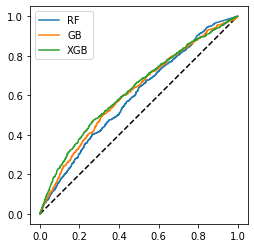

In [69]:
fig, ax = plt.subplots()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_gb, tpr_gb, label='GB')
plt.plot(fpr_xgb, tpr_xgb, label='XGB')
ax.set_aspect('equal')
plt.legend()
plt.show()